# **IMPORTING**

In [ ]:
!pip install xlrd==1.2.0

In [ ]:
!pip install geopandas

In [ ]:
%matplotlib inline
import pandas as pd
import geopandas
import xlrd
import matplotlib.pyplot  as plt
import numpy as np

#**0. caricare i fogli "categories", "brands" e "products" in tre dataframe distinti. Scrivere poi le istruzioni per estrarre le seguenti informazioni:**

In [ ]:
categorie = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/BikeStores (1).xls',sheet_name ='categories')
categorie

,category_id,category_name
0,1,Children Bicycles
1,2,Comfort Bicycles
2,3,Cruisers Bicycles
3,4,Cyclocross Bicycles
4,5,Electric Bikes
5,6,Mountain Bikes
6,7,Road Bikes


In [ ]:
brand = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/BikeStores (1).xls',sheet_name ='brands')
brand

,brand_id,brand_name
0,1,Electra
1,2,Haro
2,3,Heller
3,4,Pure Cycles
4,5,Ritchey
5,6,Strider
6,7,Sun Bicycles
7,8,Surly
8,9,Trek


In [ ]:
prodotti = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/BikeStores (1).xls',sheet_name ='products')
prodotti

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016.0,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016.0,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016.0,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016.0,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016.0,1320.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019.0,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019.0,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019.0,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019.0,3799.99


# **1. il catalogo complessivo dei prodotti. Visualizzare il nome del prodotto, il nome della marca e la categoria**

In [ ]:
products_brands = pd.merge(prodotti,brand,how='inner',on ='brand_id')
total_df = pd.merge(products_brands,categorie,how='inner',on ='category_id')
pd.merge(products_brands,categorie,how='inner',on='category_id')[['product_name','brand_name','category_name']]

,product_name,brand_name,category_name
0,Trek 820 - 2016,Trek,Mountain Bikes
1,Trek Fuel EX 8 29 - 2016,Trek,Mountain Bikes
2,Trek Slash 8 27.5 - 2016,Trek,Mountain Bikes
3,Trek Remedy 29 Carbon Frameset - 2016,Trek,Mountain Bikes
4,Trek X-Caliber 8 - 2017,Trek,Mountain Bikes
...,...,...,...
316,Sun Bicycles Cruz 7 - 2017,Sun Bicycles,Comfort Bicycles
317,Sun Bicycles Cruz 3 - Women's - 2017,Sun Bicycles,Comfort Bicycles
318,Sun Bicycles Cruz 7 - Women's - 2017,Sun Bicycles,Comfort Bicycles
319,Sun Bicycles Drifter 7 - 2017,Sun Bicycles,Comfort Bicycles


# **2. il numero di prodotti per ogni categoria. Visualizzare i nomi delle categorie e il numero dei prodotti.**

In [ ]:
num_prodotti = pd.merge(prodotti,categorie,how='inner',on='category_id').groupby('category_name')['category_name'].count().sort_values()
num_prodotti

category_name
Cyclocross Bicycles    10
Electric Bikes         24
Comfort Bicycles       30
Children Bicycles      59
Mountain Bikes         60
Road Bikes             60
Cruisers Bicycles      78
Name: category_name, dtype: int64

<BarContainer object of 7 artists>

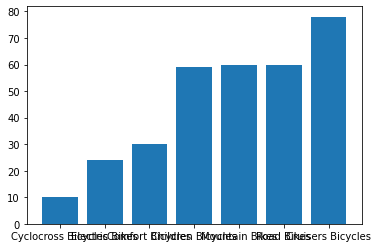

In [ ]:
fig = plt.figure()
ax = plt.axes()

ax.bar(num_prodotti.index,num_prodotti.values)

# **3. il numero di prodotti per ogni marca (brand). Visualizzare i nomi dei brand e il numero di prodotti**

In [ ]:
num_prodotti_marca = pd.merge(prodotti,brand,how='inner',on='brand_id').groupby('brand_name')['product_name'].count().sort_values()
num_prodotti_marca

brand_name
Ritchey           1
Heller            3
Pure Cycles       3
Strider           3
Haro             10
Sun Bicycles     23
Surly            25
Electra         118
Trek            135
Name: product_name, dtype: int64

<BarContainer object of 9 artists>

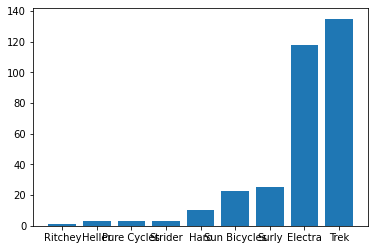

In [ ]:
fig = plt.figure()
ax = plt.axes()

ax.bar(num_prodotti_marca.index,num_prodotti_marca.values)

# **4. i nomi dei prodotti della marca Trek**

In [ ]:
products_brands[products_brands.brand_name =='Trek']['product_name']

0                            Trek 820 - 2016
1                   Trek Fuel EX 8 29 - 2016
2                   Trek Slash 8 27.5 - 2016
3      Trek Remedy 29 Carbon Frameset - 2016
4                       Trek Conduit+ - 2016
                       ...                  
130             Trek Checkpoint ALR 5 - 2019
131     Trek Checkpoint ALR 5 Women's - 2019
132      Trek Checkpoint SL 5 Women's - 2019
133              Trek Checkpoint SL 6 - 2019
134      Trek Checkpoint ALR Frameset - 2019
Name: product_name, Length: 135, dtype: object

# **5. i prodotti delle categorie che hanno la parola 'Bikes' nel nome**

In [ ]:
total_df[total_df.category_name.str.contains('Bikes')][['category_name','product_name']]

,category_name,product_name
0,Mountain Bikes,Trek 820 - 2016
1,Mountain Bikes,Trek Fuel EX 8 29 - 2016
2,Mountain Bikes,Trek Slash 8 27.5 - 2016
3,Mountain Bikes,Trek Remedy 29 Carbon Frameset - 2016
4,Mountain Bikes,Trek X-Caliber 8 - 2017
...,...,...
139,Road Bikes,Surly ECR - 2018
140,Road Bikes,Surly Pack Rat - 2018
141,Road Bikes,Surly Straggler 650b - 2018
142,Road Bikes,Surly ECR Frameset - 2018


# **6. la categoria che ha il prodotto che costa di più**

In [ ]:
total_df[total_df.list_price == total_df.list_price.max()][['category_name','product_name','list_price']]

,category_name,product_name,list_price
106,Road Bikes,Trek Domane SLR 9 Disc - 2018,11999.99


# **7. i brand con almeno 100 prodotti. Viaulizzare il nome del brand e il numero di prodotti**

In [ ]:
numprod_x_brand = total_df.groupby('brand_name').count().reset_index()[['brand_name','product_name']]
numprod_x_brand2 =numprod_x_brand[numprod_x_brand['product_name']>= 100]
numprod_x_brand2

,brand_name,product_name
0,Electra,118
8,Trek,135


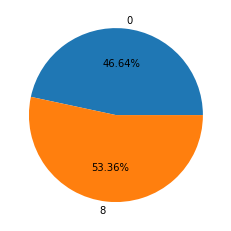

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.pie(numprod_x_brand2['product_name'],labels=numprod_x_brand2.index, autopct ='%1.2f%%')
plt.show()

# **8. la marca del prodotto 'Electra Townie Original 21D - 2016'**

In [ ]:
total_df[total_df.product_name =='Electra Townie Original 21D - 2016' ][['brand_name']]

,brand_name
213,Electra
291,Electra


In [ ]:
total_df

,product_id,product_name,brand_id,category_id,model_year,list_price,brand_name,category_name
0,1,Trek 820 - 2016,9,6,2016.0,379.99,Trek,Mountain Bikes
1,4,Trek Fuel EX 8 29 - 2016,9,6,2016.0,2899.99,Trek,Mountain Bikes
2,7,Trek Slash 8 27.5 - 2016,9,6,2016.0,3999.99,Trek,Mountain Bikes
3,8,Trek Remedy 29 Carbon Frameset - 2016,9,6,2016.0,1799.99,Trek,Mountain Bikes
4,29,Trek X-Caliber 8 - 2017,9,6,2017.0,999.99,Trek,Mountain Bikes
...,...,...,...,...,...,...,...,...
316,107,Sun Bicycles Cruz 7 - 2017,7,2,2017.0,416.99,Sun Bicycles,Comfort Bicycles
317,108,Sun Bicycles Cruz 3 - Women's - 2017,7,2,2017.0,449.99,Sun Bicycles,Comfort Bicycles
318,109,Sun Bicycles Cruz 7 - Women's - 2017,7,2,2017.0,416.99,Sun Bicycles,Comfort Bicycles
319,110,Sun Bicycles Drifter 7 - 2017,7,2,2017.0,470.99,Sun Bicycles,Comfort Bicycles


# **9. il numero di prodotti per ogni anno. Visualizzare l'anno e il numero di prodotti**

In [ ]:
num_prod_year = total_df.groupby('model_year')[['product_name']].count()
num_prod_year

,product_name
model_year,
2016.0,25
2017.0,85
2018.0,195
2019.0,6


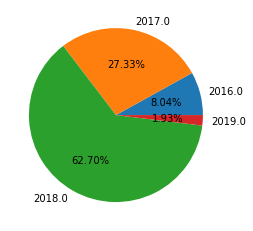

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.pie(num_prod_year['product_name'],labels=num_prod_year.index, autopct ='%1.2f%%')
plt.show()